In [69]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sn
import seaborn as sns
from category_encoders import TargetEncoder
%matplotlib inline


In [28]:
# Import Data

titanic = pd.read_csv("C:\\temp\\Data Science\\IOD\\data\\titanic_train.csv")

In [29]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


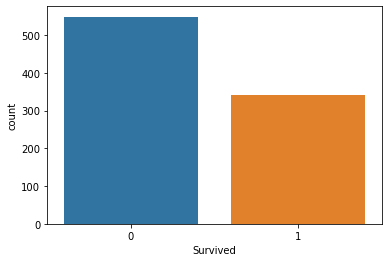

In [60]:
sns.countplot(x = 'Survived', data=titanic)

In [30]:
sex =  pd.get_dummies(titanic['Sex'])

In [31]:
# Setup Target encoder object

encoder = TargetEncoder()

In [32]:
# Target ncoding on "Embarked"

titanic['Embarked_encoded'] = encoder.fit_transform(titanic['Embarked'], titanic['Survived'])

In [33]:
# Visualize data after target encoding on "Embarked"
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.336957
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.553571
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.336957
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.336957
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.336957


In [34]:
# Check all unique values used for encoding

titanic['Embarked_encoded'].unique()

array([0.33695652, 0.55357143, 0.38961039, 0.83428862])

In [35]:
# Check total missing values

titanic.isnull().sum()

PassengerId           0
Survived              0
Pclass                0
Name                  0
Sex                   0
Age                 177
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Cabin               687
Embarked              2
Embarked_encoded      0
dtype: int64

In [36]:
# Function to impute Age as it is import feature and have 177 missing values

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
                return 29
        else:
                return 24
    else:
        return Age

In [37]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)

In [1]:
titanic.drop(['Sex','Name','Ticket'],axis=1,inplace=True)

NameError: name 'titanic' is not defined

In [39]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked_encoded
0,1,0,3,22.0,1,0,7.2500,NaN,0.336957
1,2,1,1,38.0,1,0,71.2833,C85,0.553571
2,3,1,3,26.0,0,0,7.9250,NaN,0.336957
3,4,1,1,35.0,1,0,53.1000,C123,0.336957
4,5,0,3,35.0,0,0,8.0500,NaN,0.336957


In [41]:
titanic = pd.concat([titanic,sex],axis=1)

In [51]:
titanic.drop('Cabin', axis = 1, inplace = True)

In [62]:
titanic.drop('PassengerId', axis =1, inplace= True)

In [63]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_encoded,female,male
0,0,3,22.0,1,0,7.2500,0.336957,0,1
1,1,1,38.0,1,0,71.2833,0.553571,1,0
2,1,3,26.0,0,0,7.9250,0.336957,1,0
3,1,1,35.0,1,0,53.1000,0.336957,1,0
4,0,3,35.0,0,0,8.0500,0.336957,0,1


In [70]:
# Function to calculate VIF
def calculate_vif(data):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = data.columns
    for i in range(0, x_var_names.shape[0]):
        y = data[x_var_names[i]]
        x = data[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)

In [71]:
print(calculate_vif(titanic.drop('Survived', axis = 1)))

                Var   Vif
7              male  4.20
6            female  3.82
0            Pclass  1.78
4              Fare  1.65
3             Parch  1.32
1               Age  1.30
2             SibSp  1.29
5  Embarked_encoded  1.10


In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(titanic.drop('Survived',axis=1), titanic['Survived'], test_size=0.30, random_state = 101)



In [65]:
X_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_encoded', 'female',
       'male'],
      dtype='object')

In [66]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter= 600)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=600)

In [67]:
preds = logreg.predict(X_test)

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.77      0.86      0.82       154
           1       0.78      0.66      0.71       114

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.77       268

